[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-06-07  39.060001  39.349998  38.910000  38.959999  38.959999  16049300
2024-06-10  38.910000  38.980000  38.520000  38.790001  38.790001  13185600
2024-06-11  38.150002  38.599998  37.959999  38.320000  38.320000  16480000
2024-06-12  38.529999  38.639999  37.480000  37.830002  37.830002  18902700
2024-06-13  37.500000  37.840000  37.310001  37.580002  37.580002  18158900
Closing price difference between yesterday and the day before: -0.25


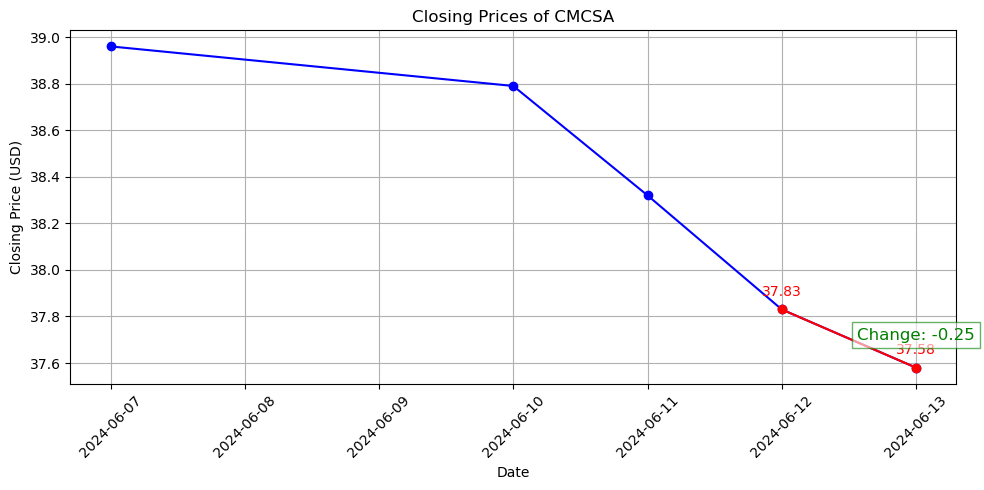

In [2]:
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
ticker_symbol = 'CMCSA'

# Define the end date
end_date = datetime.now().date()

# Define a start date far enough in the past to ensure we get at least two trading days
start_date = end_date - timedelta(days=7)

# Fetch historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

print(stock_data)

# Check if we have enough data points
if len(stock_data) >= 2:
    # Extract the last two closing prices using .iloc for position-based indexing
    closing_prices = stock_data['Close'].iloc[-2:]

    # Calculate the difference
    price_difference = closing_prices.iloc[-1] - closing_prices.iloc[-2]
    print(f"Closing price difference between yesterday and the day before: {price_difference}")

    # Plot the closing prices
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Close'], marker='o', linestyle='-', color='b')

    # Highlight the last two closing prices
    plt.plot(stock_data.index[-2:], closing_prices, marker='o', color='r')
    
    # Annotate the points
    for date, price in closing_prices.items():
        plt.annotate(f'{price:.2f}', (date, price), textcoords="offset points", xytext=(0,10), ha='center', color='r')

    # Annotate the price difference
    plt.annotate(f'Change: {price_difference:.2f}', 
                 (stock_data.index[-1], closing_prices.iloc[-1]),
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha='center', 
                 color='g', 
                 fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='green'))
    
    # Customize the plot
    plt.title(f'Closing Prices of {ticker_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Not enough data points to calculate the price difference")
